In [1]:
import cv2
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import glob
import os.path as op

In [2]:
def imshow(img, cmap=None):
    plt.imshow(img, cmap)
    plt.show()

In [7]:
def load_data(data_path, data_ext):
    images = []
    for filename in glob.glob(op.join(data_path, '*.'+data_ext)):
        print(filename)
        
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        
        imshow(img)
    
    return np.array(images)

images/parrington/prtn13.jpg


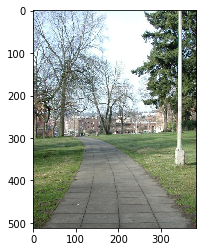

images/parrington/prtn07.jpg


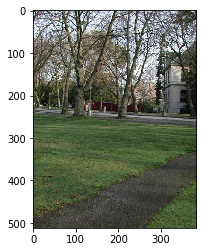

images/parrington/prtn06.jpg


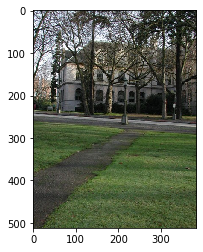

images/parrington/prtn12.jpg


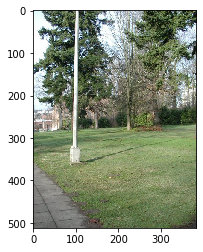

images/parrington/prtn04.jpg


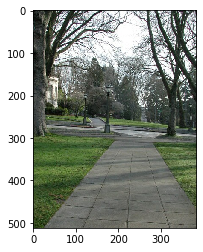

images/parrington/prtn10.jpg


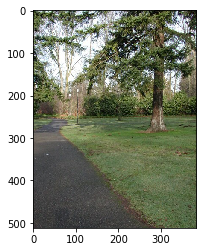

images/parrington/prtn11.jpg


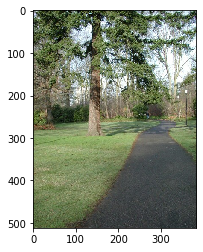

images/parrington/prtn05.jpg


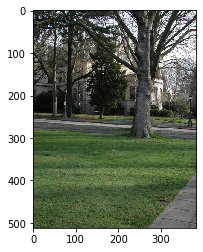

images/parrington/prtn01.jpg


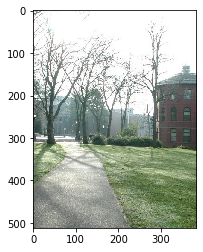

images/parrington/prtn15.jpg


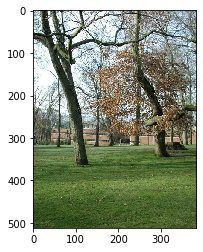

images/parrington/prtn14.jpg


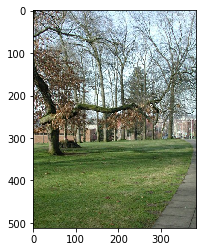

images/parrington/prtn00.jpg


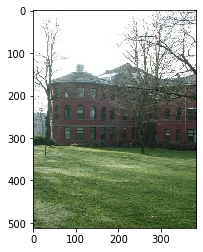

images/parrington/prtn16.jpg


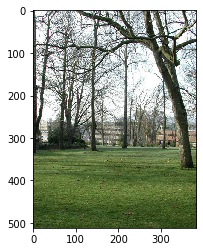

images/parrington/prtn02.jpg


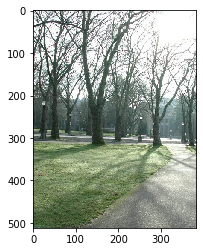

images/parrington/prtn03.jpg


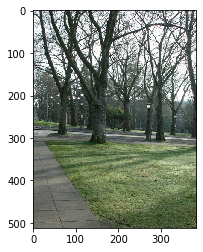

images/parrington/prtn17.jpg


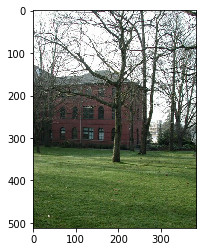

images/parrington/prtn08.jpg


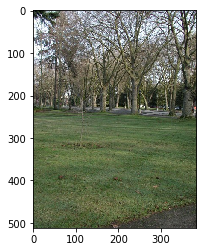

images/parrington/prtn09.jpg


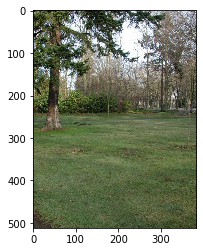

(18, 512, 384, 3)


In [94]:
img_set = load_data('images/parrington', 'jpg')
print(img_set.shape)

In [182]:

# TODO: Adaptive Non-Maximum Suppression
def ANMS(img, nums):
    pass


# Harris Matrix
def Harris(I, ks=(5, 5), sig_i=1.5, sig_d=1.0):
    # convert to float (0 ~ 1)
    I_f = I.astype(np.float32) / 255.0
    
    # gradient (h, w, c)
    # padding: mirror (h+2, w+2, c)
    I_f = cv2.copyMakeBorder(I_f, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    # filter: [-1, 0, 1] (h, w, c)
    g_x = I_f[2:, 1:-1] - I_f[:-2, 1:-1]
    g_y = I_f[1:-1, 2:] - I_f[1:-1, :-2]
    imshow(g_x)
    imshow(g_y)
    
    # blurred gradient (h, w, c)
    I_x = cv2.GaussianBlur(g_x, ks, sig_d)
    I_y = cv2.GaussianBlur(g_y, ks, sig_d)
    imshow(I_x)
    imshow(I_y)
    
    # (h, w, c)
    S_x2 = cv2.GaussianBlur(I_x * I_x, ks, sig_i)
    S_y2 = cv2.GaussianBlur(I_y * I_y, ks, sig_i)
    S_xy = cv2.GaussianBlur(I_x * I_y, ks, sig_i)
    imshow(S_x2)
    imshow(S_y2)
    imshow(S_xy)
    
    # Harris (h, w, 2, 2, c)
    #H_l = np.moveaxis([[S_x2, S_xy], [S_xy, S_y2]], (0, 1), (2, 3))
    
    # determinant and trace (h, w, c)
    #det_H = H_l[:, :, 0, 0]*H_l[:, :, 1, 1] - H_l[:, :, 1, 0]*H_l[:, :, 0, 1]
    #tr_H = np.trace(H_l, axis1=2, axis2=3)
    det_H = S_x2 * S_y2 - S_xy * S_xy
    tr_H = S_x2 + S_y2
    imshow(det_H)
    imshow(tr_H)
    
    return det_H, tr_H

def HarrisCornerDetector(img, k=0.05, th=1):
    # Harris (h-2, w-2, c)
    det_H, tr_H = Harris(img)
    
    # response (h-2, w-2, c)
    R = det_H - k*np.power(tr_H, 2)
    imshow(R)
    print(np.max(R), np.min(R))
    
    # thresholding
    R_th = R[:, :]>0.01*R.max()
    imshow(R_th)
    
    # non-maximum suppression
    #ANMS()
    
    # TODO: sub-pixel refinement
    

# Multi-Scale Oriented Patches
def MSOP(img, ks=(5, 5), sig_p=1.0, sig_i=1.5, sig_d=1.0):
    
    # Multi-Scale Harris Corner Detector
    P = []
    f_HM = []
    
    P_l = img
    for i in range(3):
        # add layer to pyramid
        P.append(P_l)
        # compute Harris
        det_H, tr_H = Harris(P[-1])
        # corner detection function
        f_HM.append(det_H / tr_H)
        print('f_HM')
        imshow(f_HM[-1])
        
        # non-maximum suppression
        #ANMS(f_HM[-1])
        
        # TODO: sub-pixel refinement
        
        # next layer
        # gaussian blur
        P_l = cv2.GaussianBlur(P[i], ks, sig_p)
        # down sampling
        P_l = P_l[::2, ::2]
    

In [173]:
def HarrisLib(img):
    img_gray = cv2.cvtColor(img_set[0], cv2.COLOR_RGB2GRAY)
    dst = cv2.cornerHarris(img_gray, 5, 3, 0.05)
    print(dst.max(), dst.min())
    imshow(dst)
    
    dst = cv2.dilate(dst, None)
    
    img_c = np.copy(img)
    
    img_c[dst>0.01*dst.max()] = [255, 0, 0]
    
    imshow(img_c)
    
    return dst
    
    

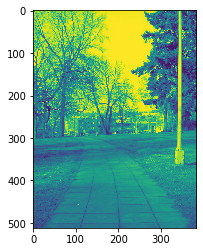

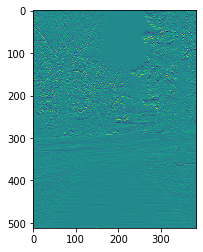

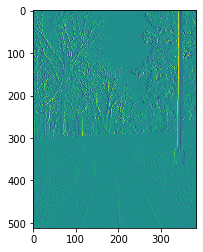

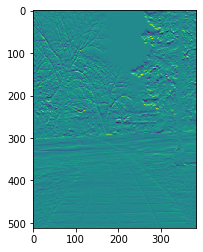

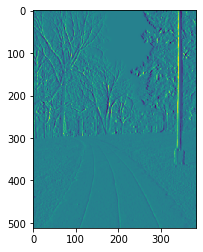

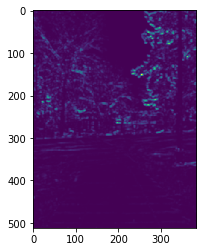

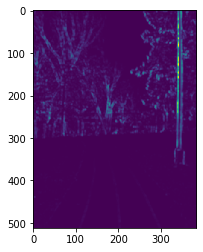

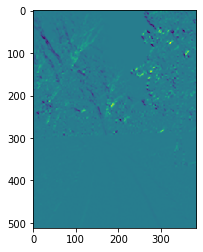

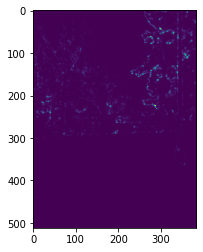

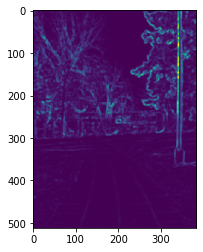

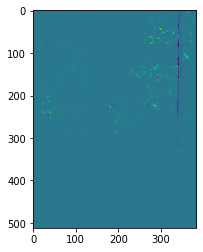

0.0022211582 -0.0014706573


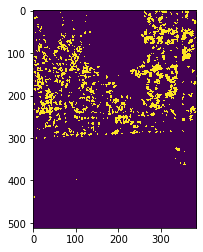

0.011881674 -0.003982301


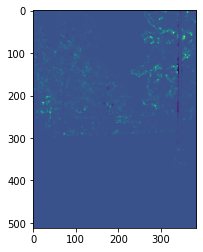

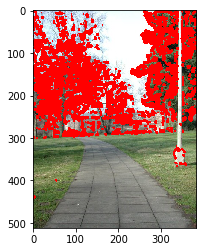

In [174]:
img_gray = cv2.cvtColor(img_set[0], cv2.COLOR_RGB2GRAY)
imshow(img_gray)

HarrisCornerDetector(img_gray)
HarrisLib(img_set[0])

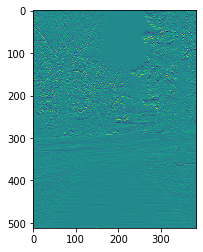

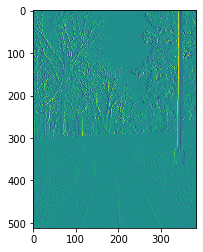

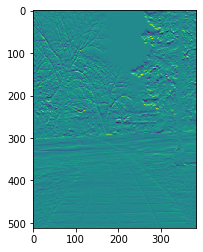

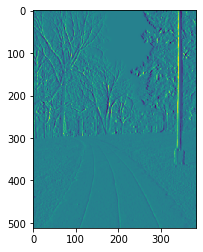

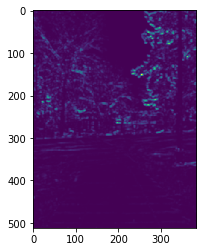

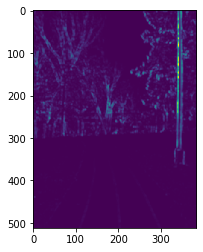

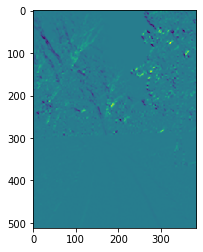

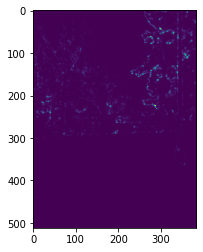

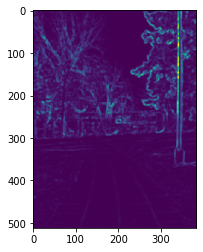

f_HM


<ipython-input-182-13e2331a1af0>:80: RuntimeWarning: invalid value encountered in true_divide
  f_HM.append(det_H / tr_H)


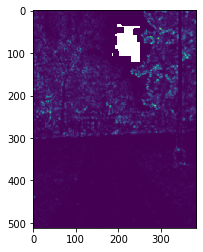

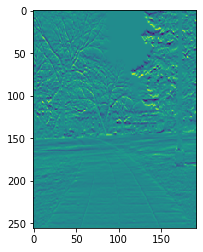

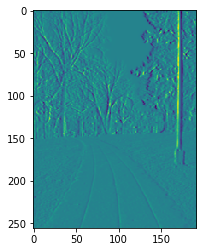

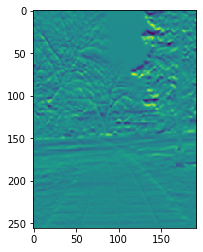

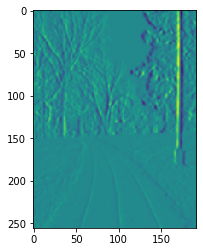

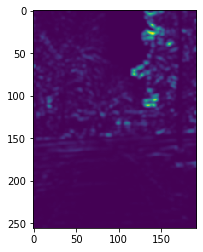

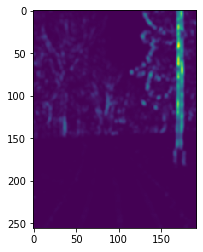

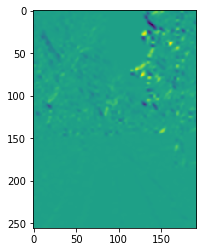

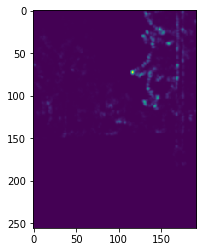

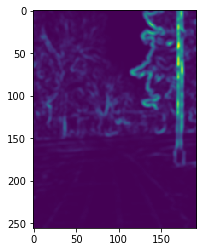

f_HM


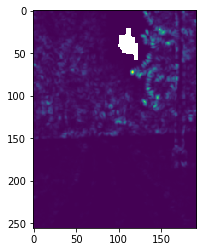

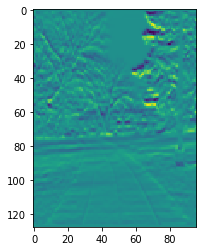

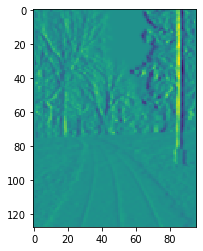

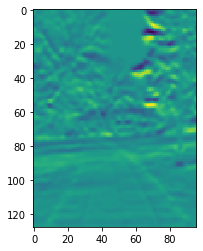

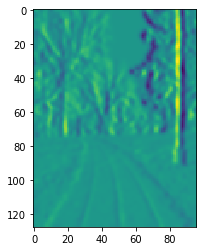

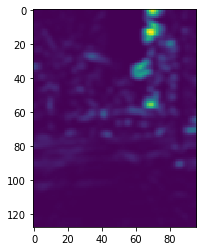

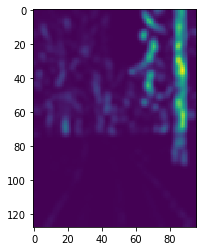

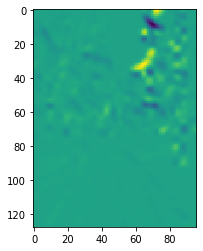

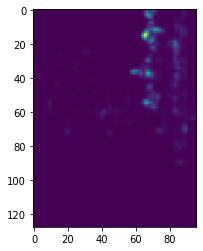

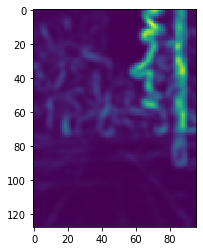

f_HM


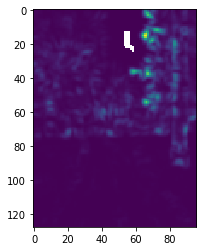

In [183]:
img_gray = cv2.cvtColor(img_set[0], cv2.COLOR_RGB2GRAY)
MSOP(img_gray)